In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
import albumentations as A
import cv2
# Import Libraries

# For visualization
import os
from matplotlib import colors
from PIL import Image

In [2]:
dataDir='../../datasets/car_damage/val/'
dataType='COCO_val_annos'
mul_dataType='COCO_mul_val_annos'
annFile='{}/{}.json'.format(dataDir,dataType)
mul_annFile='{}/{}.json'.format(dataDir,mul_dataType)
img_dir = "../../datasets/car_damage/img/"

In [3]:
coco=COCO(annFile)
mul_coco=COCO(mul_annFile)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [4]:
# display categories and supercategories

#Single Class #Damage dataset
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories for damages: \n{}\n'.format(', '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories for damages: \n{}\n'.format(', '.join(nms)))

#Multi Class #Parts dataset

mul_cats = mul_coco.loadCats(mul_coco.getCatIds())
mul_nms=[cat['name'] for cat in mul_cats]
print('COCO categories for parts: \n{}\n'.format(', '.join(mul_nms)))

mul_nms = set([mul_cat['supercategory'] for mul_cat in mul_cats])
print('COCO supercategories for parts: \n{}\n'.format(', '.join(mul_nms)))

COCO categories for damages: 
damage

COCO supercategories for damages: 
part

COCO categories for parts: 
headlamp, rear_bumper, door, hood, front_bumper

COCO supercategories for parts: 
part



In [5]:
# get all images containing 'damage' category, select one at random
catIds = coco.getCatIds(catNms=['damage'])
imgIds = coco.getImgIds(catIds=catIds)

In [54]:
random_img_id = random.choice(imgIds)
print("{} image id was selected at random from the {} list".format(random_img_id, imgIds))

6 image id was selected at random from the [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] list


In [55]:
# Load the image
imgId = coco.getImgIds(imgIds = [random_img_id])
img = coco.loadImgs(imgId)[0]
print("Image details \n",img)

Image details 
 {'coco_url': '', 'date_captured': '2020-07-14 09:59:34.190485', 'file_name': '62.jpg', 'flickr_url': '', 'height': 1024, 'id': 6, 'license': 1, 'width': 1024}


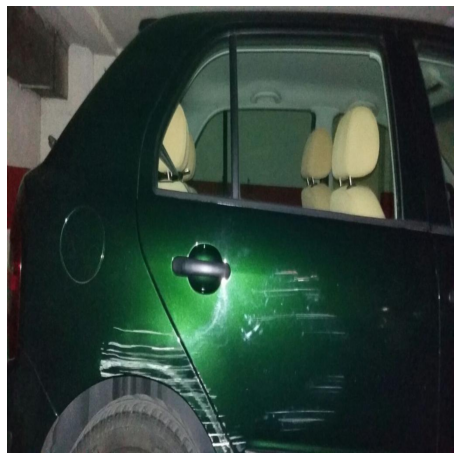

In [56]:
I = io.imread(img_dir + '/' + img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [57]:
#get damage annotations
annIds = coco.getAnnIds(imgIds=imgId,iscrowd=None)
anns = coco.loadAnns(annIds)

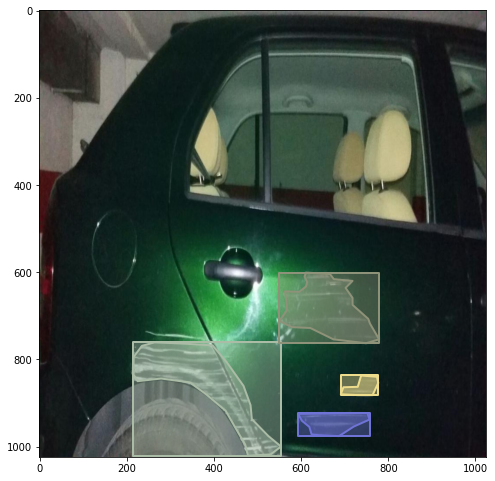

In [58]:
#Plot damages
plt.imshow(I)
plt.axis('on')
coco.showAnns(anns, draw_bbox=True )

In [59]:
transform = A.Compose([
    A.RandomCrop(width=1024, height=1024),
    A.HorizontalFlip(p=0.5),
    A.Rotate(p=0.2),
])

# len(anns)
mask = coco.annToMask(anns[0])
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

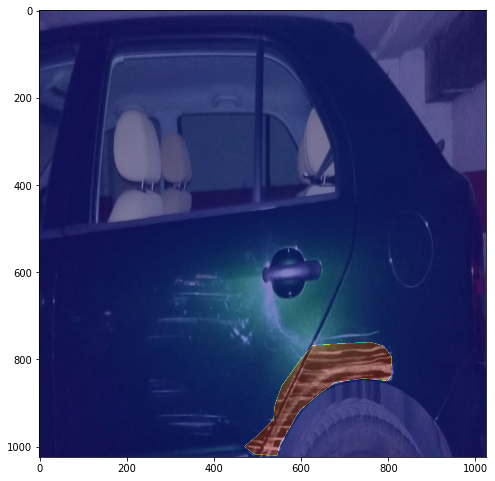

In [60]:
transformed = transform(image=I, mask=mask)

transformed_image = transformed['image']
transformed_mask = transformed['mask']

plt.imshow(transformed_image)
plt.imshow(transformed_mask, cmap='jet', alpha=0.5)
plt.show()

In [61]:
import imantics

polygons = imantics.Mask(transformed_mask).polygons()
# print(len(polygons.segmentation[0]))
# print(polygons.segmentation)
# print(polygons.bbox())

In [62]:
img_list = polygons.draw(transformed_image)
img_list = polygons.bbox().draw(img_list)

from PIL import Image
im = Image.fromarray(img_list)
im.save("your_file.jpg")

In [63]:
transformed_anno = imantics.Annotation.from_polygons(polygons, imantics.Image.from_coco(img), imantics.Category.from_coco(coco.loadCats(ids=[1])[0]))

In [64]:
transformed_anno.area

29967

In [70]:
polygons = imantics.Mask(mask).polygons()
# print(polygons.points)
# print(polygons.segmentation)

In [71]:
import json
with open(annFile) as f:
    data = json.load(f)

dataset = imantics.Dataset.from_coco(data)

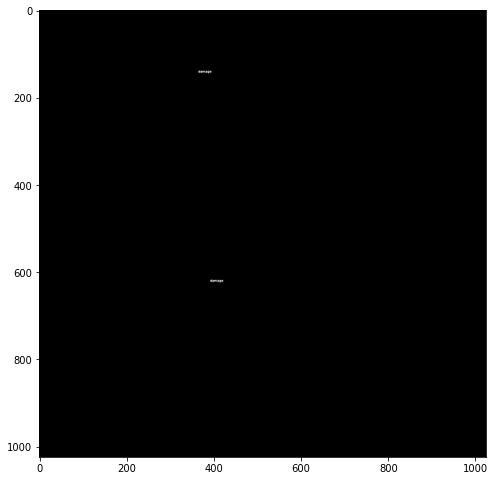

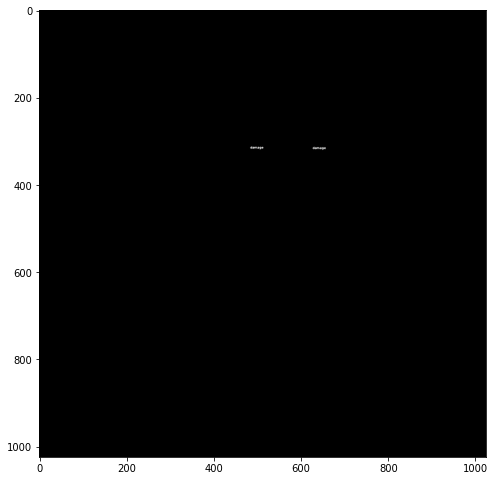

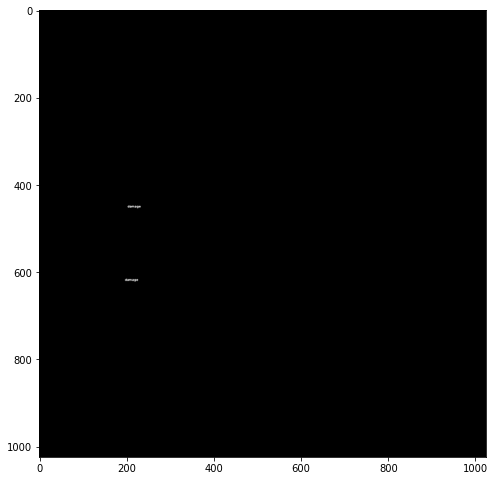

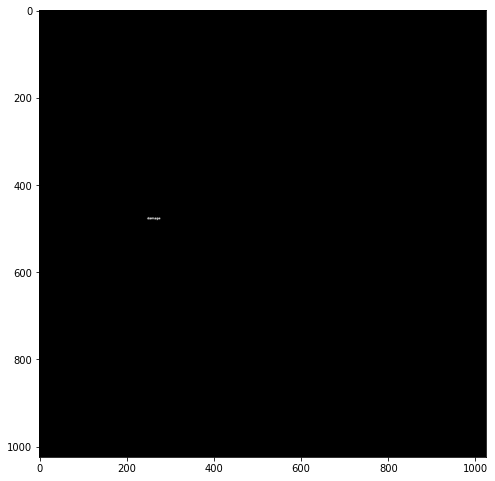

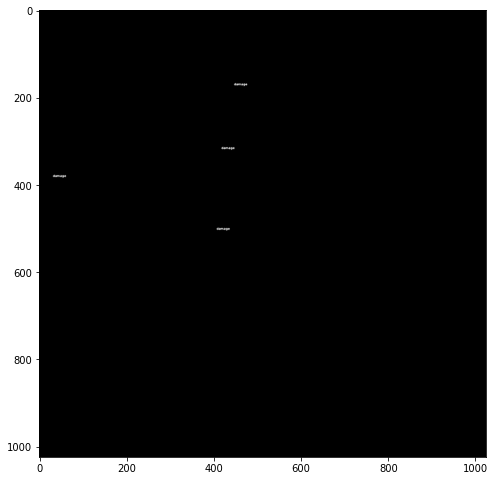

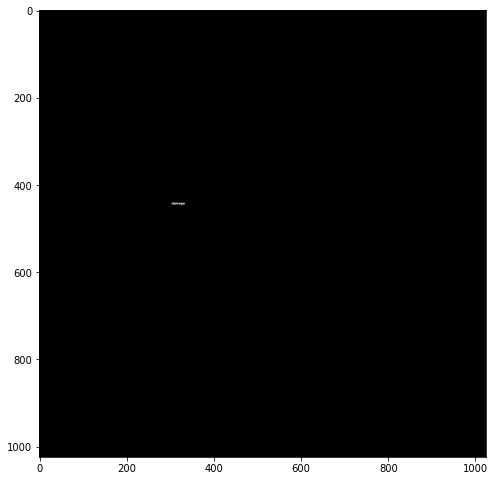

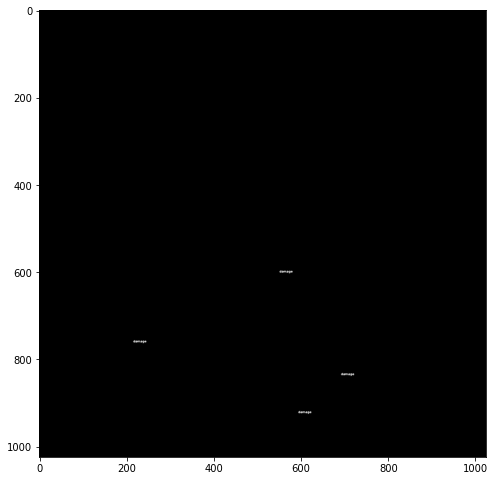

KeyboardInterrupt: 

In [73]:
for image in dataset.iter_images():
    draw = image.draw()
    plt.imshow(draw)
    plt.show()
    # etree.tostring(image.export(style='voc'), pretty_print=True).decode('utf-8')